In [149]:
import pandas as pd

df=pd.read_csv('lending_data.csv')
df.shape

(77536, 8)

In [150]:
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [151]:
# Display basic information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB
None


# Feature Extraction

In [152]:
import pandas as pd

# Assuming `df` is your dataset
def categorize_dti(dti):
    if dti < 0.36:
        return 'Low'
    elif 0.36 <= dti <= 0.50:
        return 'Medium'
    else:
        return 'High'

# Apply the function to create a new column
df['dti_risk_category'] = df['debt_to_income'].apply(categorize_dti)

# Display the first few rows to verify
#print(df[['debt_to_income', 'dti_risk_category']].head())
df

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status,dti_risk_category
0,10700.0,7.672,52800,0.431818,5,1,22800,0,Medium
1,8400.0,6.692,43600,0.311927,3,0,13600,0,Low
2,9000.0,6.963,46100,0.349241,3,0,16100,0,Low
3,10700.0,7.664,52700,0.430740,5,1,22700,0,Medium
4,10800.0,7.698,53000,0.433962,5,1,23000,0,Medium
...,...,...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600,1,High
77532,17700.0,10.662,80900,0.629172,11,2,50900,1,High
77533,17600.0,10.595,80300,0.626401,11,2,50300,1,High
77534,16300.0,10.068,75300,0.601594,10,2,45300,1,High


# Check for missing values

In [153]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
loan_size            0
interest_rate        0
borrower_income      0
debt_to_income       0
num_of_accounts      0
derogatory_marks     0
total_debt           0
loan_status          0
dti_risk_category    0
dtype: int64


# Checking for Outliers

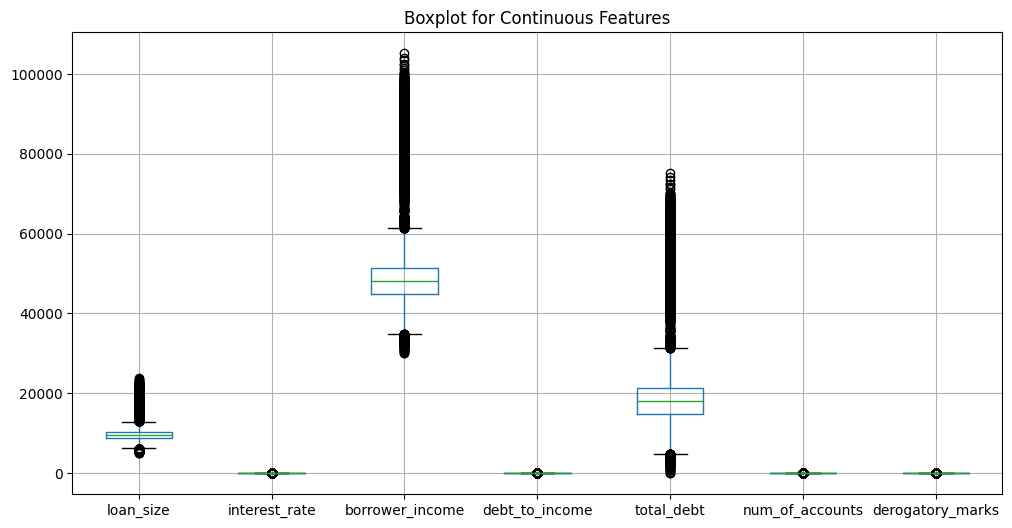

In [154]:
# Boxplots to visualize potential outliers
from matplotlib import pyplot as plt

continuous_features = ['loan_size', 'interest_rate', 'borrower_income',
                       'debt_to_income', 'total_debt','num_of_accounts','derogatory_marks']
plt.figure(figsize=(12, 6))
df[continuous_features].boxplot()
plt.title("Boxplot for Continuous Features")
plt.show()

# Visualizations

Frequency Table for Class distribution
loan_status
1     2500
0    75036
Name: count, dtype: int64


<Axes: xlabel='loan_status'>

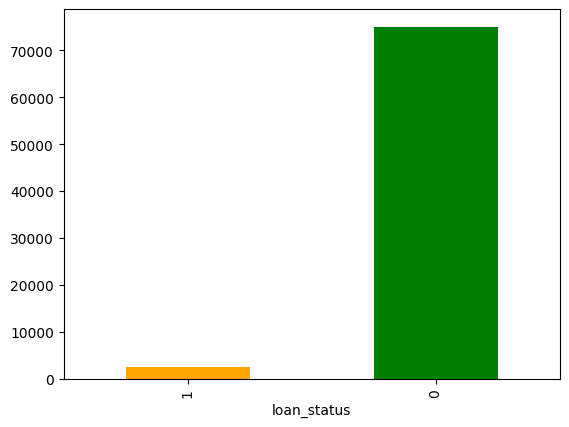

In [155]:
# change position
classDist = df['loan_status'].value_counts(ascending=True)
print ('Frequency Table for Class distribution')
print(classDist)
classDist.plot(kind='bar',color=['orange', 'green'])

<ipython-input-156-2cfb8d2a11c9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='loan_size', data=df, palette='Set2')


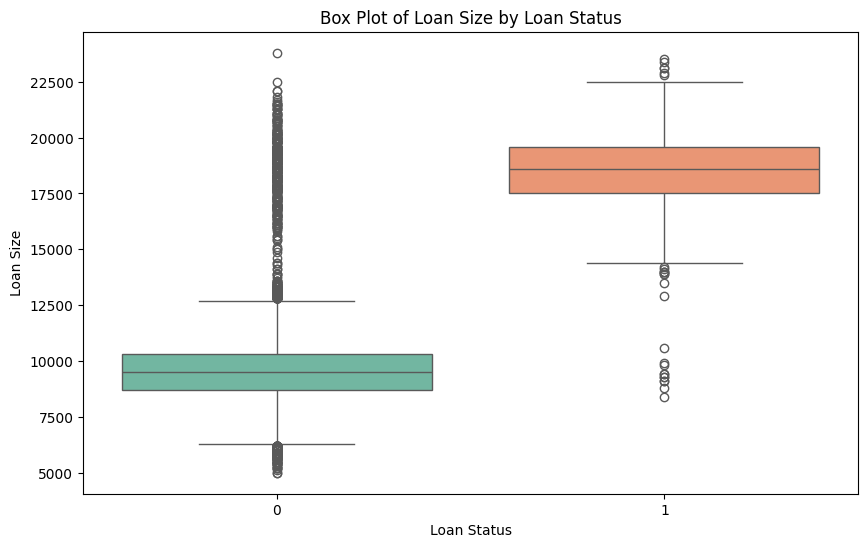

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your dataset
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_size', data=df, palette='Set2')

# Add labels and title
plt.xlabel('Loan Status')
plt.ylabel('Loan Size')
plt.title('Box Plot of Loan Size by Loan Status')

# Show the plot
plt.show()


Frequency Table for DTI Category
dti_risk_category
Medium    43210
Low       31076
High       3250
Name: count, dtype: int64


<Axes: xlabel='dti_risk_category'>

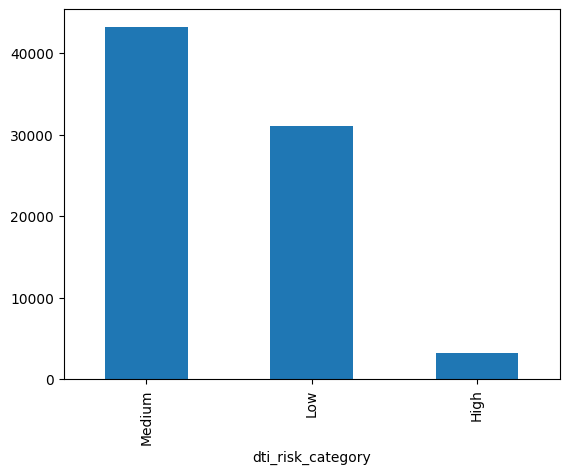

In [157]:
genderDist = df['dti_risk_category'].value_counts()
print ('Frequency Table for DTI Category')
print(genderDist)
genderDist.plot(kind='bar')


#import matplotlib.pyplot as plt

# Assuming `df` is your dataset and `dti_risk_category` is the column
#plt.figure(figsize=(8, 6))
#df['dti_risk_category'].value_counts().plot(kind='bar', color=['skyblue', 'orange', 'green'])

# Add labels and title
#plt.xlabel('DTI Risk Category')
#plt.ylabel('Count')
#plt.title('Distribution of DTI Risk Categories')
#plt.show()


In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

#plt.figure(figsize=(15, 10))
#for i, feature in enumerate(continuous_features, 1):
#    plt.subplot(2, 3, i)
#    sns.histplot(df[feature], bins=30, kde=True)
#    plt.title(f"Distribution of {feature}")
#plt.tight_layout()
#plt.show()

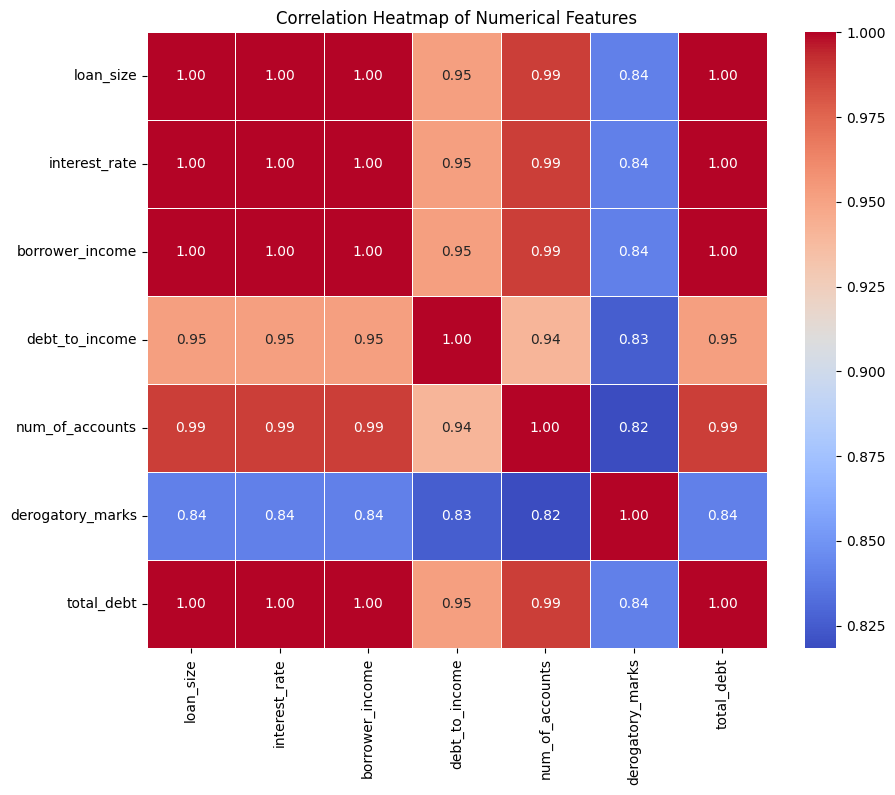

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your dataset and it contains numerical columns
# First, calculate the correlation matrix
correlation_matrix = df[['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income', 'num_of_accounts', 'derogatory_marks', 'total_debt']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Add title
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


# Outliers

In [160]:
df['borrower_income'].describe()

,borrower_income
count,77536.000000
mean,49221.949804
std,8371.635077
min,30000.000000
25%,44800.000000
50%,48100.000000
75%,51400.000000
max,105200.000000


In [161]:
df['total_debt'].describe()

,total_debt
count,77536.000000
mean,19221.949804
std,8371.635077
min,0.000000
25%,14800.000000
50%,18100.000000
75%,21400.000000
max,75200.000000


# Removing outliers above 99 percentile

In [162]:
# Calculate the 99th percentile for both borrower_income and total_debt
borrower_income_99th = df['borrower_income'].quantile(0.99)
total_debt_99th = df['total_debt'].quantile(0.99)

# Remove outliers above the 99th percentile
cleaned_df = df[
    (df['borrower_income'] <= borrower_income_99th) &
    (df['total_debt'] <= total_debt_99th)
]

# Check the shape of the original and cleaned dataset
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", cleaned_df.shape)

# Save the cleaned dataset to a new CSV file (optional)
cleaned_df.to_csv("cleaned_lending_data.csv", index=False)


Original dataset shape: (77536, 9)
Cleaned dataset shape: (76775, 9)


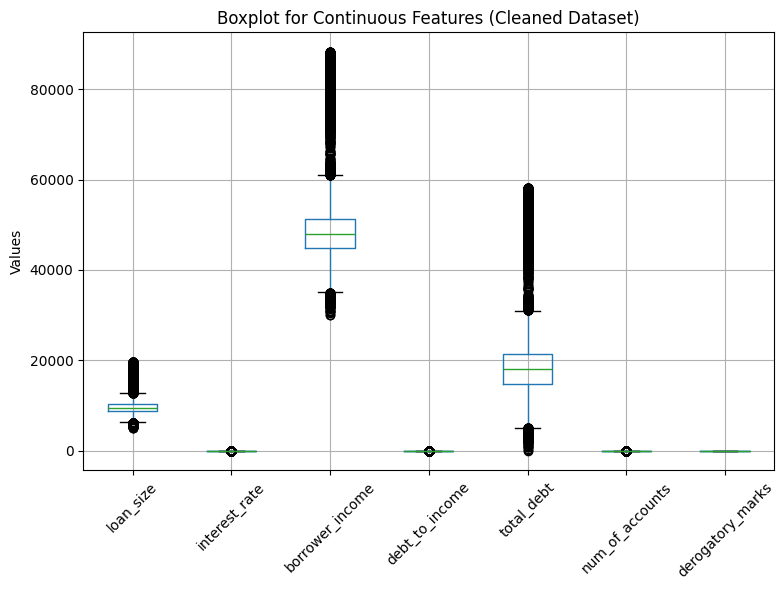

In [178]:
import matplotlib.pyplot as plt

# List of columns to include in the boxplot
columns_to_plot = ['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income', 'total_debt',
                   'num_of_accounts', 'derogatory_marks']

# Create the boxplot
plt.figure(figsize=(8, 6))
cleaned_df[columns_to_plot].boxplot()

# Add title and labels
plt.title("Boxplot for Continuous Features (Cleaned Dataset)")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [164]:
cleaned_df['total_debt'].describe()

,total_debt
count,76775.000000
mean,18800.940410
std,7255.411018
min,0.000000
25%,14800.000000
50%,18000.000000
75%,21300.000000
max,58200.000000


In [165]:
cleaned_df['borrower_income'].describe()

,borrower_income
count,76775.000000
mean,48800.940410
std,7255.411018
min,30000.000000
25%,44800.000000
50%,48000.000000
75%,51300.000000
max,88200.000000


# Data Balancing

crearly the data is immbalanced

In [166]:
class_counts= cleaned_df['loan_status'].value_counts()
class_counts

,count
loan_status,
0,74926
1,1849


<Axes: ylabel='count'>

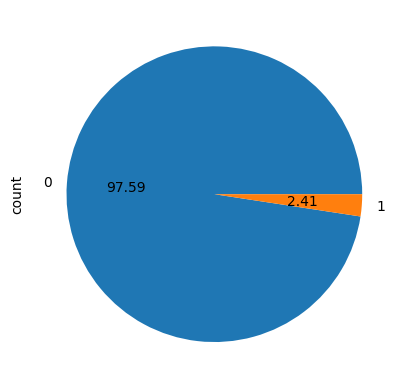

In [167]:
# Split data into features (X) and target (y)
X = cleaned_df.drop(columns=['loan_status','dti_risk_category'])
y = cleaned_df['loan_status']

y.value_counts().plot.pie(autopct='%.2f')

Frequency Table for Class distribution
loan_status
1     1849
0    74926
Name: count, dtype: int64


<Axes: xlabel='loan_status'>

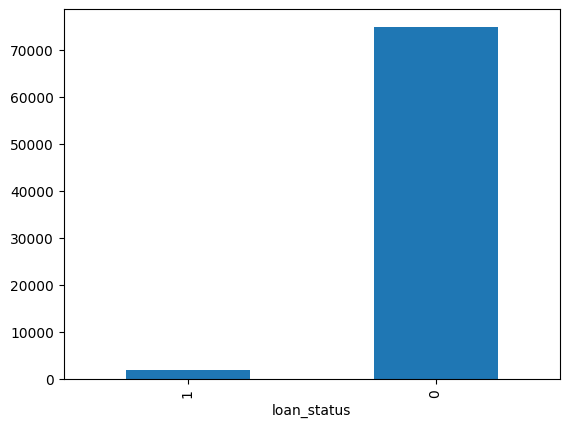

In [180]:
# change position
classDist = cleaned_df['loan_status'].value_counts(ascending=True)
print ('Frequency Table for Class distribution')
print(classDist)
classDist.plot(kind='bar')


#Using SMOTE technic

In [168]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())


Class distribution after SMOTE:
loan_status
0    52448
1    52448
Name: count, dtype: int64


# Now you can proceed to train a model using X_train_smote and y_train_smote

<Axes: ylabel='count'>

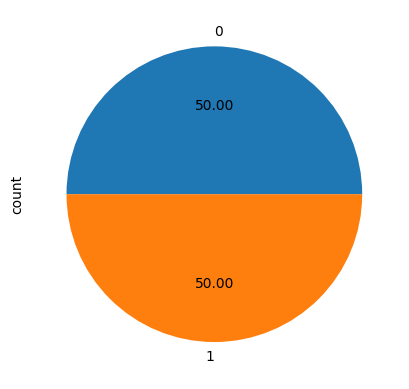

In [169]:
y_train_smote.value_counts().plot.pie(autopct='%.2f')

<Axes: title={'center': 'Bar Chart with Percentages'}, xlabel='loan_status'>

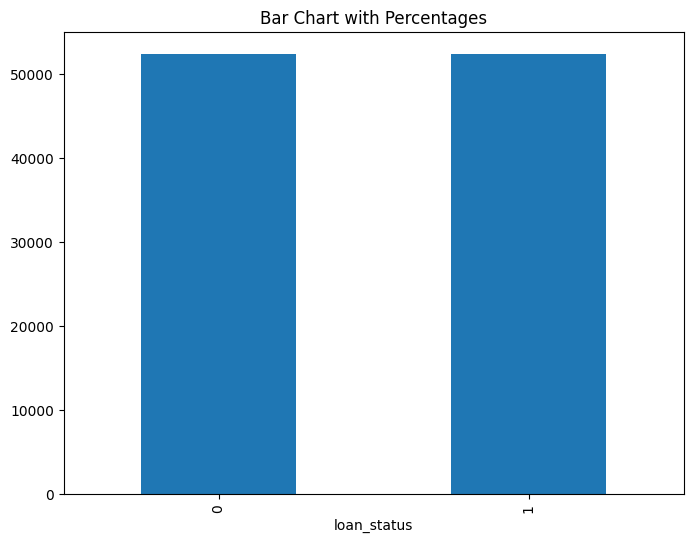

In [170]:
#y_train_smote.value_counts().plot(kind='bar', autopct='%.2f')
y_train_smote.value_counts().plot(kind='bar',
                                  figsize=(8, 6),
                                  title='Bar Chart with Percentages')

In [171]:
# Plot the class distribution in the balanced data
#y_train_smote.value_counts().plot(kind='bar', color=['blue', 'orange'])
#plt.title('Class Distribution After SMOTE')
#plt.xlabel('Loan Status')
#plt.ylabel('Count')
#plt.xticks(ticks=[0, 1], labels=['Class 0 (Non-default)', 'Class 1 (Default)'], rotation=0)
#plt.show()


# Logistic Regression

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Train the model using the resampled data (SMOTE)
log_reg.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.995528155255503
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22478
           1       0.85      0.99      0.91       555

    accuracy                           1.00     23033
   macro avg       0.92      0.99      0.96     23033
weighted avg       1.00      1.00      1.00     23033

Confusion Matrix:
 [[22379    99]
 [    4   551]]


# Decision Tree

Decision Tree Classifier Accuracy: 0.9936

Confusion Matrix:
[[22393    85]
 [   63   492]]


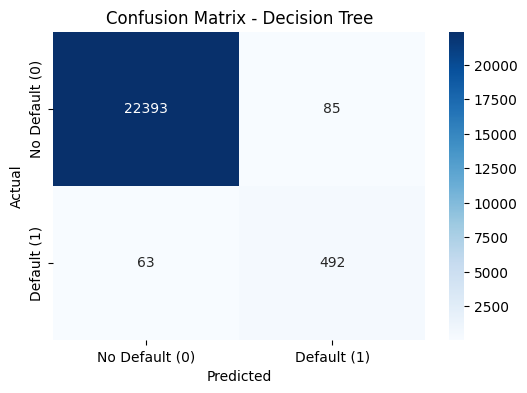


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22478
           1       0.85      0.89      0.87       555

    accuracy                           0.99     23033
   macro avg       0.92      0.94      0.93     23033
weighted avg       0.99      0.99      0.99     23033



In [173]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#import matplotlib.pyplot as plt
#import seaborn as sns

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train the model on the balanced training data
dt_classifier.fit(X_train_smote, y_train_smote)

# Make predictions on the test data
y_pred_dt = dt_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Classifier Accuracy: {accuracy_dt:.4f}")

# Generate and print the confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix:")
print(conf_matrix_dt)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default (0)', 'Default (1)'], yticklabels=['No Default (0)', 'Default (1)'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print the classification report
class_report_dt = classification_report(y_test, y_pred_dt)
print("\nClassification Report:")
print(class_report_dt)

# Random Forest

In [174]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assuming 'data_cleaned' is the processed DataFrame
#X = data_cleaned.drop('loan_status', axis=1)
#y = data_cleaned['loan_status']

# Normalize continuous features
continuous_features = ['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income', 'total_debt']
scaler = StandardScaler()
X[continuous_features] = scaler.fit_transform(X[continuous_features])

# Initialize the Random Forest model
mod_forest = RandomForestClassifier(n_estimators=100, max_features=3, random_state=42)

# Fit the model to the training data
mod_forest.fit(X, y)

# Make predictions on the training data
predictions = pd.DataFrame({
    'loan_status_rf_pred_class': mod_forest.predict(X)
})

# Confusion matrix
conf_matrix = confusion_matrix(y, predictions['loan_status_rf_pred_class'])
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy calculation
accuracy = accuracy_score(y, predictions['loan_status_rf_pred_class'])
print(f"Accuracy: {accuracy: }")

# Classification report
class_report = classification_report(y, predictions['loan_status_rf_pred_class'])
print("Classification Report:")
print(class_report)

# Feature importance extraction
feature_importances = pd.DataFrame({
    'variable': X.columns,
    'MeanDecreaseGini': mod_forest.feature_importances_
}).sort_values(by='MeanDecreaseGini', ascending=False)

print("Feature Importances:")
print(feature_importances)

Confusion Matrix:
[[74778   148]
 [   36  1813]]
Accuracy:  0.9976033865190491
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     74926
           1       0.92      0.98      0.95      1849

    accuracy                           1.00     76775
   macro avg       0.96      0.99      0.98     76775
weighted avg       1.00      1.00      1.00     76775

Feature Importances:
           variable  MeanDecreaseGini
1     interest_rate          0.404107
0         loan_size          0.172151
2   borrower_income          0.167521
3    debt_to_income          0.132619
6        total_debt          0.105201
4   num_of_accounts          0.018359
5  derogatory_marks          0.000042


# KNN

KNN Accuracy: 0.9956149871922894
KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22478
           1       0.85      0.99      0.92       555

    accuracy                           1.00     23033
   macro avg       0.93      0.99      0.96     23033
weighted avg       1.00      1.00      1.00     23033

KNN Confusion Matrix:
 [[22385    93]
 [    8   547]]


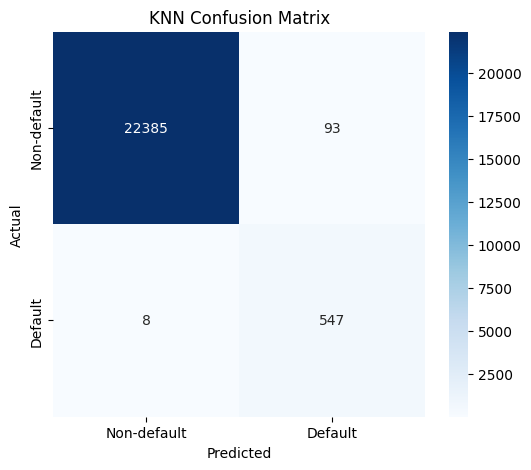

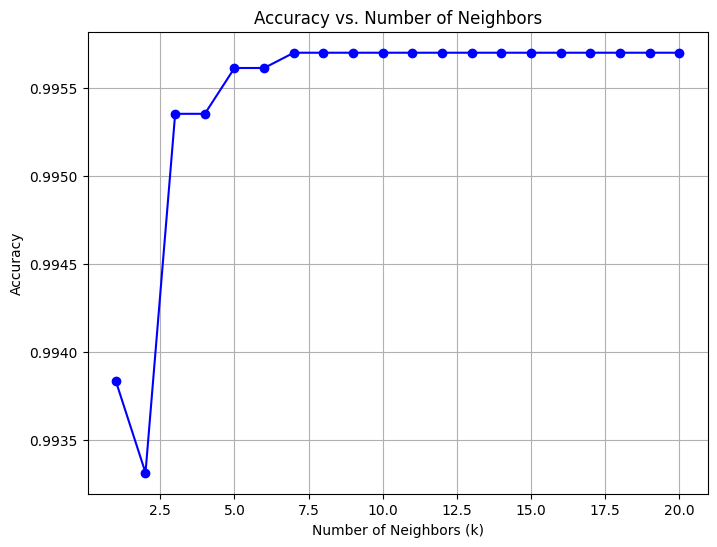

In [175]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors as needed
knn.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the model
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

# Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-default', 'Default'], yticklabels=['Non-default', 'Default'])
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot accuracy vs. number of neighbors
accuracies = []
neighbors = range(1, 21)  # Test n_neighbors from 1 to 20
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_smote, y_train_smote)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 6))
plt.plot(neighbors, accuracies, marker='o', color='b')
plt.title("Accuracy vs. Number of Neighbors")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()